In [1]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from pathlib import Path
import torch
import matplotlib.pyplot as plt

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
class OTU_2dDataSet(Dataset):
    def __init__(self, images_path, labels_path, data_csv):
        self.images_path = images_path
        self.labels_path = labels_path
        self.dataDf = pd.read_csv(data_csv, delimiter='  ',  index_col=False)
        
    def __len__(self):
        return len(self.dataDf)
    
    
    def __getitem__(self, idx):
        item = self.dataDf.iloc[idx]
        im_path = str(self.images_path/item.file)
        lbl_path = str(self.labels_path/item.file).replace('.JPG', '_binary_binary.PNG')
        im = read_image(im_path)/255
        lbl = (read_image(lbl_path)[0,:,:]) > 0 # convert to bool
        return im, lbl

In [176]:
images_dir = DATA_DIR/'images'
labels_dir = DATA_DIR/'annotations'
train_csv = DATA_DIR/'train_cls.txt'

In [177]:
ds = OTU_2dDataSet(images_dir, labels_dir, train_csv)

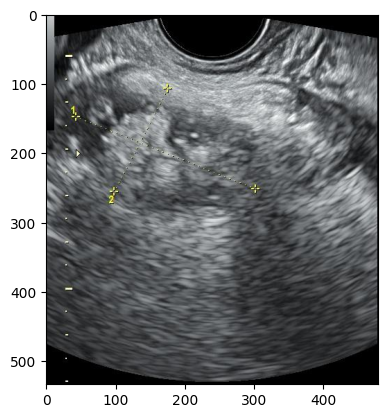

In [178]:
plt.imshow(im.permute(1,2,0))

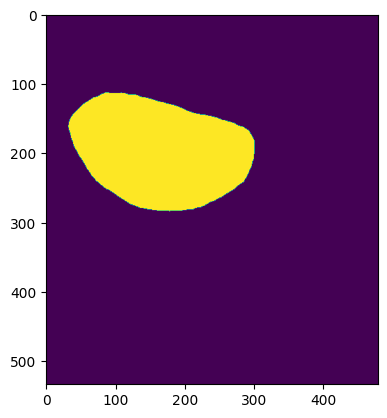

In [174]:
plt.imshow(lbl)

In [181]:
?read_image

In [165]:
dl = DataLoader(ds, batch_size=4,shuffle=True)

In [180]:
for x,y in dl:
    print(x.shape)
    print(y.shape)
    break

RuntimeError: stack expects each tensor to be equal size, but got [3, 543, 958] at entry 0 and [3, 534, 959] at entry 1